In [18]:

## Load packages (installation is needed)
import pandas as pd
import datetime
#from datetime import datetime
from scipy import signal

import numpy as np
from numpy.fft import fft, ifft

import pymap3d as pm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from pyproj import Proj
#from scipy.fft import fft, fftfreq

#pd.set_option('display.max_rows', None)

In [26]:
## input data
data = pd.read_csv("data/B_BIG.csv", sep=";")
data["dates"]

data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))

## set index
data = data.set_index(['date'])
data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data

,code,X,Y,Z,Hz,V,S,hsta,htarg,dates,h,min,sec,ddate,time
date,,,,,,,,,,,,,,,
2022-04-03 10:34:48.580,B1,118.7129,120.9442,18.9715,46.4219,83.7406,29.0278,1.638,0,3/4/2022,10,34,48.58,2022-04-03,10:34:48.58
2022-04-03 10:34:49.270,B2,118.7122,120.9435,18.9713,46.4218,83.7405,29.0268,1.638,0,3/4/2022,10,34,49.27,2022-04-03,10:34:49.27
2022-04-03 10:34:49.840,B3,118.7128,120.9442,18.9715,46.4216,83.7404,29.0278,1.638,0,3/4/2022,10,34,49.84,2022-04-03,10:34:49.84
2022-04-03 10:34:50.410,B4,118.7129,120.9442,18.9714,46.4218,83.7408,29.0278,1.638,0,3/4/2022,10,34,50.41,2022-04-03,10:34:50.41
2022-04-03 10:34:51.610,B5,118.7124,120.9433,18.9712,46.4223,83.7407,29.0268,1.638,0,3/4/2022,10,34,51.61,2022-04-03,10:34:51.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 10:52:27.870,B1797,118.7126,120.9433,18.9709,46.4227,83.7414,29.0268,1.638,0,3/4/2022,10,52,27.87,2022-04-03,10:52:27.87
2022-04-03 10:52:28.450,B1798,118.7125,120.9434,18.9708,46.4223,83.7416,29.0268,1.638,0,3/4/2022,10,52,28.45,2022-04-03,10:52:28.45
2022-04-03 10:52:29.040,B1799,118.7126,120.9433,18.9708,46.4227,83.7417,29.0268,1.638,0,3/4/2022,10,52,29.04,2022-04-03,10:52:29.04


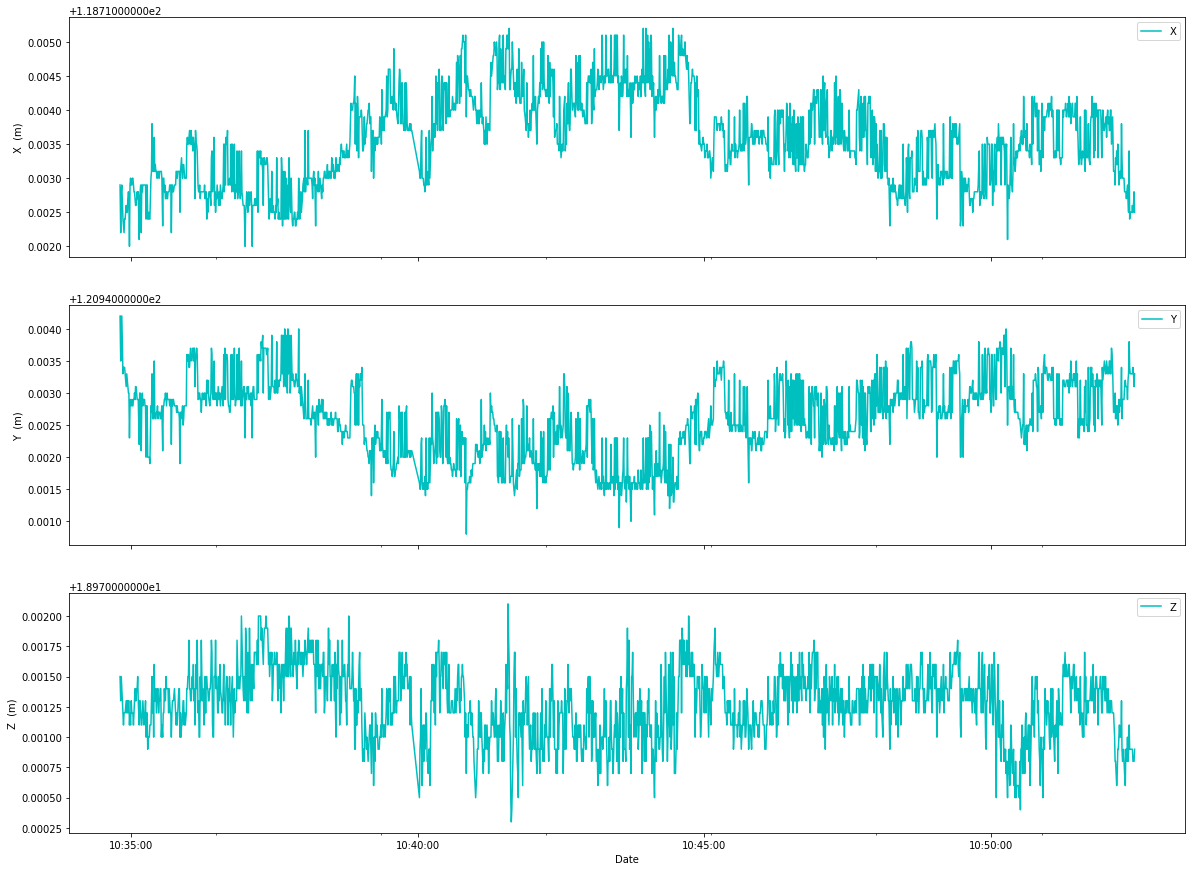

In [27]:
## make figure
#fig, ax = plt.subplots(figsize=(10, 6))
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)


plot_cols = ['X', 'Y', 'Z' ]

data[plot_cols].plot(subplots=True, ax=axes, marker=' ', color='c')

month_day_formatter = mdates.DateFormatter("%H:%M:%S")

for ax, col in zip(axes, plot_cols):
    # add axis labels
    ax.set_ylabel(col + '  (m)')
    ax.set_xlabel('Date')
    ax.xaxis.set_major_formatter(month_day_formatter)

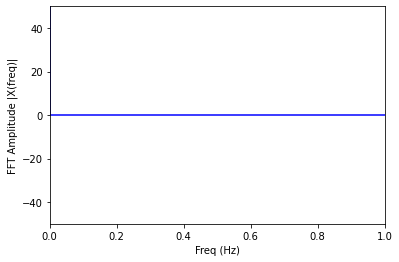

In [32]:
sr=1800
X = fft(data['Z'])
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 1)
plt.ylim(-50, 50)
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

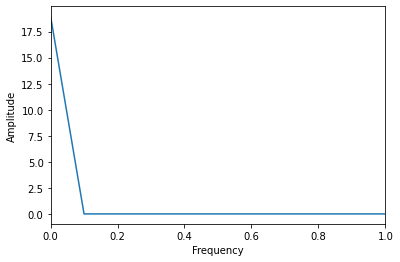

In [29]:
obs=data['Z']
# Frequency domain representation
samplingFrequency = 180
fourierTransform = np.fft.fft(obs)/len(obs)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(obs)/2))] # Exclude sampling frequency

tpCount     = len(obs)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod






# Frequency domain representation

#plt.set_title('Fourier transform depicting the frequency components')

 

plt.plot(frequencies, abs(fourierTransform))
plt.xlabel('Frequency')

plt.ylabel('Amplitude')
plt.xlim(0, 1)

 

plt.show()


(0.0, 0.1)

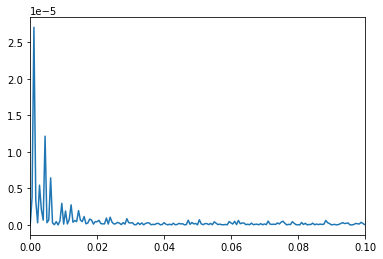

In [30]:
# Estimate power spectral density using a periodogram
f, Pxx = signal.periodogram(obs)

# lets plot this periodogram
plt.plot(f, Pxx)
plt.xlim(0, 0.1)

In [17]:
top_3_periods = {}

# get indices for 3 highest Pxx values
top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:3]

# use indices from previous step to
# get 3 frequencies with highest power
freqs = f[top3_freq_indices]

# use same indices to get powers as well
power = Pxx[top3_freq_indices]

# we are interested in period and it is calculated as 1/frequency 
periods = 1 / np.array(freqs)

# populate dict with calculated values
top_3_periods['period1'] = periods[0]
top_3_periods['freq1'] = freqs[0]
top_3_periods['power1'] = power[0]

top_3_periods['period2'] = periods[1]
top_3_periods['freq2'] = freqs[1]
top_3_periods['power2'] = power[1]

top_3_periods['period3'] = periods[2]
top_3_periods['freq3'] = freqs[2]
top_3_periods['power3'] = power[2]

top_3_periods

{'period1': 257.7142857142857,
 'freq1': 0.003880266075388027,
 'power1': 1.5722758980269407e-05,
 'period2': 106.11764705882352,
 'freq2': 0.009423503325942351,
 'power2': 4.992336125396669e-06,
 'period3': 601.3333333333334,
 'freq3': 0.0016629711751662971,
 'power3': 4.361230825172134e-06}